In [ ]:
"""
THIS IS A BASE MODEL TO FIND OUT THE BAD IMAGES ON THE TRAINING PROCESS
"""

from fastai.vision import *
import pandas as pd
from sklearn.model_selection import train_test_split

tfms = get_transforms(flip_vert=True)

classes = ['sertifikat', 'nope']
dataset_path = Path('.')
df = pd.read_csv(dataset_path/'labels.csv')
train, test = train_test_split(df, test_size=.2)

data = ImageDataBunch.from_df(dataset_path,df = df, ds_tfms=tfms, size=128, bs=12).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
data.show_batch(rows=3, figsize=(12,9))

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
import torch 

print(torch.cuda.is_available())

In [ ]:
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot(suggestion=True)
mgr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-4))

In [ ]:
learn.save('sertifclf-stage1')

In [ ]:
from fastai.widgets import *

ds, idxs = DatasetFormatter().from_toplosses(learn)


In [ ]:
ImageCleaner(ds, idxs, Path('.'))

# Finished Cleaning

In [5]:
import pandas as pd
df = pd.read_csv('cleaned.csv')

In [6]:
from fastai.vision import *
defaults.device = torch.device('cuda') 
tfms = get_transforms(flip_vert=False, max_rotate=10)

In [7]:
data = ImageDataBunch.from_df(Path('.'),df = df, ds_tfms=tfms, size=256, 
                                   bs=3).normalize(imagenet_stats)

# resnet 134

In [8]:
from fastai.metrics import error_rate
learn = cnn_learner(data, models.densenet201, metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.030901,0.596845,0.306667,02:04
1,1.127808,0.526410,0.240000,01:51
2,0.851047,0.254231,0.133333,02:03
3,0.946301,0.331913,0.133333,01:59


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 7.59E-08


epoch,train_loss,valid_loss,error_rate,time
0,0.689715,0.206186,0.080000,02:38
1,0.842238,0.242937,0.120000,02:39
2,0.882124,0.230816,0.106667,02:46
3,0.830207,0.245144,0.106667,03:01


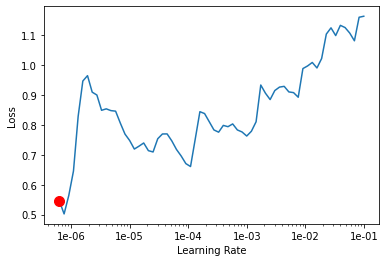

In [9]:
learn.save('sertifclf-stage1')
learn.load('sertifclf-stage1')

learn.unfreeze()

learn.lr_find()
learn.recorder.plot(suggestion=True)


In [ ]:
mgr = learn.recorder.min_grad_lr
learn.fit_one_cycle(4, max_lr=slice(mgr/10, mgr))
learn.save('sertifclf-stage2')

# ini resnet34

In [ ]:
learn.load('sertifclf-stage1')
learn.data = data # replace data yang baru
learn.freeze()
learn.fit_one_cycle(4)

learn.unfreeze()

learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-7, 1e-5))

In [ ]:
learn.save('sertifclf-stage2')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,15))

# export models

In [9]:
learn = learn.load('sertifclf-stage2')
learn.export('sertifclf.pkl')

In [10]:
!ls

cleaned.csv  lol.ipynb	__pycache__  readme.md	    train.py
labels.csv   models	raw	     sertifclf.pkl
